In [1]:
#import the necesssary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading-in data
In this step the data on protein interactions and protein sequences has to be read in in appropriate dataframes for analysis. The data has to be cleaned and checked for some errors, also some intermediate analysis to see if data is of suitable quality has to be checked.

In [2]:
#reading-in the dataframes
interactions = pd.read_csv("balanced_interactions.csv", index_col = 0)
sequences = pd.read_csv("uniprot_human.csv", index_col = 0)
print(interactions.shape)
print(sequences.shape)

(27774, 3)
(20117, 2)


In [3]:
interactions.head()

,ID1,ID2,Interaction
0,O43172,O43290,1
1,Q9NWS9,P17028,1
2,Q9Y230,Q86XP3,1
3,Q96RL1,Q13564,1
4,O75400,P10586,1


In [4]:
sequences.head()

,ID,Sequence
0,P00441,MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF...
1,Q13046,MGPLSAPPCTQHITWKGLLLTASLLNFWNPPTTAQVTIEAQPPKVS...
2,P0C868,MVVDLKNLLFNPSKPVSRGSQPADVDLMIDCLVSCLRVSPHNNQQF...
3,Q96G97,MVNDPPVPALLWAQEVGQVLAGRARRLLLQFGVLFCTILLLLWVSV...
4,Q9UBN7,MTSTGQDSTTTRQRRSRQNPQSPPQDSSVTSKRNIKKGAVPRSIPN...


# Analyse distribution in the data

In [5]:
#checking distribution of interactions/non-interactions
interactions.Interaction.value_counts()

1    13887
0    13887
Name: Interaction, dtype: int64

In [6]:
#count nan values
print(interactions.isna().sum())
print(sequences.isna().sum())

ID1            0
ID2            0
Interaction    0
dtype: int64
ID          0
Sequence    0
dtype: int64


In [7]:
#look at distribution of string length values in dataframe
sequences.Sequence.apply(len).describe()

count    20117.000000
mean       557.538102
std        580.104342
min         50.000000
25%        256.000000
50%        417.000000
75%        671.000000
max      34350.000000
Name: Sequence, dtype: float64

In [8]:
#look in the data of distribution on how often one protein is found in interacting vs noninteracting pair
#if the protein is not in data then do not count it in

ratios = []
np_interactions = []
np_noninteractions = []

for line in sequences.itertuples():
    print(line[0])
    prot = line[1]
    interac = 0.0
    noninterac = 0.0
    present = 0.0
    
    for row in interactions.itertuples():
        A = row[1]
        B = row[2]
        
        if (prot==A) or (prot == B):
            present = 1
            
            if (row[3]) == 1:
                interac +=1
            else:
                noninterac +=1
                
    if present==1:
        np_interactions.append(interac)
        np_noninteractions.append(noninterac)
        ratios.append(interac/(noninterac+interac)) 


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063


3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710


5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351


6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997


8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638


10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
1023

11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
1160

12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
1297

14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
1434

15551
15552
15553
15554
15555
15556
15557
15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
1571

16926
16927
16928
16929
16930
16931
16932
16933
16934
16935
16936
16937
16938
16939
16940
16941
16942
16943
16944
16945
16946
16947
16948
16949
16950
16951
16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
1709

18292
18293
18294
18295
18296
18297
18298
18299
18300
18301
18302
18303
18304
18305
18306
18307
18308
18309
18310
18311
18312
18313
18314
18315
18316
18317
18318
18319
18320
18321
18322
18323
18324
18325
18326
18327
18328
18329
18330
18331
18332
18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
1845

19658
19659
19660
19661
19662
19663
19664
19665
19666
19667
19668
19669
19670
19671
19672
19673
19674
19675
19676
19677
19678
19679
19680
19681
19682
19683
19684
19685
19686
19687
19688
19689
19690
19691
19692
19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
1982

Text(0.5, 1.0, 'Histogram of Relative ratio')

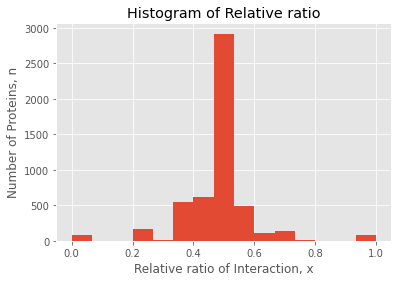

In [9]:

#plot the distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")
plt.hist(ratios, density=False, bins=15)  # `density=False` would make counts
plt.ylabel("Number of Proteins, n")
plt.xlabel('Relative ratio of Interaction, x');
plt.savefig("Dataset_2_relative ratio of interaction.svg")
plt.title("Histogram of Relative ratio")

(0.0, 35.0)

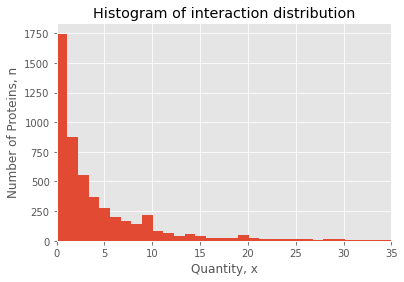

In [10]:
#plot the distribution of interaction degree
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")
plt.hist(np_interactions, density=False, bins=200)  # `density=False` would make counts
plt.ylabel("Number of Proteins, n")
plt.xlabel('Quantity, x')
plt.title("Histogram of interaction distribution")
plt.xlim(right=35)
plt.xlim(left=0)

(0.0, 50.0)

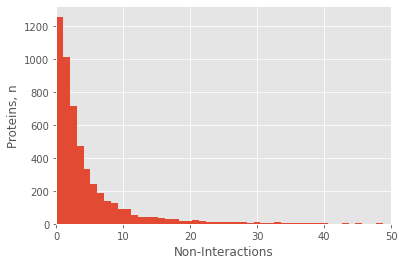

In [11]:
#plot the distribution of noninteraction degree
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(np_noninteractions, density=False, bins=200)  # `density=False` would make counts
plt.ylabel("Proteins, n")
plt.xlabel('Non-Interactions');
plt.xlim(right=50)
plt.xlim(left=0)


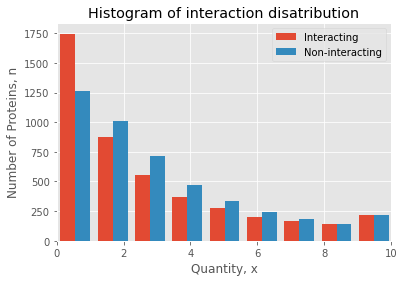

In [12]:
#plot the distribution of interaction and non-interaction degree
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use("ggplot")
plt.hist([np_interactions, np_noninteractions], density=False, bins=200)  # `density=False` would make counts
plt.ylabel("Number of Proteins, n")
plt.xlabel('Quantity, x')
plt.title("Histogram of interaction disatribution")
plt.legend(['Interacting','Non-interacting'])
plt.xlim(right=10)
plt.xlim(left=0)
plt.savefig("Dataset_2_interaction_distribution.svg")

# Analyse if interaction pairs are unique (non-repeating)
Just in case we check if pairs of proteins are not agregated in duplicates

In [13]:
repeats = []
for line in interactions.itertuples():
    print(line[0])
    A = line[1]
    B = line[2]
    n = 0
    for row in interactions.itertuples():
        if (row[1] == A or row[1] == B) and (row[2] == A or row[2] == B):
            n +=1       
    repeats.append(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069


3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713


5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356


6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008


8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651


10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
1024

11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
1162

12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
1299

14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
1436

15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
1574

16952
16953
16954
16955
16956
16957
16958
16959
16960
16961
16962
16963
16964
16965
16966
16967
16968
16969
16970
16971
16972
16973
16974
16975
16976
16977
16978
16979
16980
16981
16982
16983
16984
16985
16986
16987
16988
16989
16990
16991
16992
16993
16994
16995
16996
16997
16998
16999
17000
17001
17002
17003
17004
17005
17006
17007
17008
17009
17010
17011
17012
17013
17014
17015
17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
1711

18333
18334
18335
18336
18337
18338
18339
18340
18341
18342
18343
18344
18345
18346
18347
18348
18349
18350
18351
18352
18353
18354
18355
18356
18357
18358
18359
18360
18361
18362
18363
18364
18365
18366
18367
18368
18369
18370
18371
18372
18373
18374
18375
18376
18377
18378
18379
18380
18381
18382
18383
18384
18385
18386
18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
1849

19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
1986

21073
21074
21075
21076
21077
21078
21079
21080
21081
21082
21083
21084
21085
21086
21087
21088
21089
21090
21091
21092
21093
21094
21095
21096
21097
21098
21099
21100
21101
21102
21103
21104
21105
21106
21107
21108
21109
21110
21111
21112
21113
21114
21115
21116
21117
21118
21119
21120
21121
21122
21123
21124
21125
21126
21127
21128
21129
21130
21131
21132
21133
21134
21135
21136
21137
21138
21139
21140
21141
21142
21143
21144
21145
21146
21147
21148
21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
21170
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
2123

22448
22449
22450
22451
22452
22453
22454
22455
22456
22457
22458
22459
22460
22461
22462
22463
22464
22465
22466
22467
22468
22469
22470
22471
22472
22473
22474
22475
22476
22477
22478
22479
22480
22481
22482
22483
22484
22485
22486
22487
22488
22489
22490
22491
22492
22493
22494
22495
22496
22497
22498
22499
22500
22501
22502
22503
22504
22505
22506
22507
22508
22509
22510
22511
22512
22513
22514
22515
22516
22517
22518
22519
22520
22521
22522
22523
22524
22525
22526
22527
22528
22529
22530
22531
22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
22577
22578
22579
22580
22581
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
22596
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
2261

23827
23828
23829
23830
23831
23832
23833
23834
23835
23836
23837
23838
23839
23840
23841
23842
23843
23844
23845
23846
23847
23848
23849
23850
23851
23852
23853
23854
23855
23856
23857
23858
23859
23860
23861
23862
23863
23864
23865
23866
23867
23868
23869
23870
23871
23872
23873
23874
23875
23876
23877
23878
23879
23880
23881
23882
23883
23884
23885
23886
23887
23888
23889
23890
23891
23892
23893
23894
23895
23896
23897
23898
23899
23900
23901
23902
23903
23904
23905
23906
23907
23908
23909
23910
23911
23912
23913
23914
23915
23916
23917
23918
23919
23920
23921
23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
2399

329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578


2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147
2148
2149
2150
2151
2152
2153
2154
2155
2156
2157
2158
2159
2160
2161
2162
2163
2164
2165
2166
2167
2168
2169
2170
2171
2172
2173
2174
2175
2176
2177
2178
2179
2180
2181
2182
2183
2184
2185
2186
2187
2188
2189
2190
2191
2192
2193
2194
2195
2196
2197
2198
2199
2200
2201
2202
2203
2204
2205
2206
2207
2208
2209
2210
2211
2212
2213
2214
2215
2216
2217
2218
2219
2220
2221
2222
2223
2224
2225
2226
2227
2228
2229
2230
2231
2232
2233
2234
2235
2236
2237
2238
2239
2240
2241
2242
2243
2244
2245
2246
2247
2248
2249
2250
2251
2252
2253
2254
2255
2256
2257
2258
2259
2260
2261
2262
2263
2264
2265
2266
2267
2268
2269
2270
2271
2272
2273
2274
2275
2276
2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317


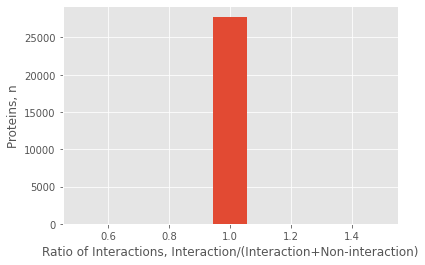

In [14]:
#plot the distribution
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.hist(repeats, density=False, bins=9)  # `density=False` would make counts
plt.ylabel("Proteins, n")
plt.xlabel('Ratio of Interactions, Interaction/(Interaction+Non-interaction)');

# Dummy feature engineering
In pair-wise problems it can be so that one item appears in interacting pairs more frequently than in the ones that are non-interacting, therefore, creating an unbalance that ML model might pick-up and use for classification. Here this new score will be introduced as part of new feature - interaction score. Interaction score (A,B)  = (Interactions for protein A + Int.prot. B)/(Int. prot. A + Int. prot. B + Nonint. prot. A + Nonint. prot. B)

In [15]:
#code that calculates the interaction score for test split and appeds it to the test dataframe
from sklearn.model_selection import train_test_split

#creating test/train split
X_train, X_test, y_train, y_test = train_test_split(interactions, interactions.Interaction, test_size=0.20, random_state=1)

train = X_train
test = X_test

scores = []
for line in test.itertuples():    
    idx = line[0]
    
    protA = line[1]
    protB = line[2]
    
    intA = train[((train.ID1 == protA) | (train.ID2 == protA)) & (train.Interaction == 1)].shape[0]
    intB = train[((train.ID1 == protB) | (train.ID2 == protB)) & (train.Interaction == 1)].shape[0]
    nonintA = train[((train.ID1 == protA) | (train.ID2 == protA)) & (train.Interaction == 0)].shape[0]
    nonintB = train[((train.ID1 == protB) | (train.ID2 == protB)) & (train.Interaction == 0)].shape[0]
    
    try:
        intscore = (intA + intB)/(intA + intB + nonintA + nonintB)
    except:
        intscore = 0.5
        
    #test.loc[idx, "Score"] = intscore
    print(idx," ",intscore)
    scores.append(intscore)
    
print(len(scores))
test["Score"] = scores

11661   0.518005540166205
6921   0.4594594594594595
24340   0.4765625
13736   0.5
17982   0.5333333333333333
5071   0.2222222222222222
17086   0.5344827586206896
13272   0.5625
4427   0.4936708860759494
15258   0.5210084033613446
23093   0.543859649122807
14846   0.6428571428571429
2508   0.4791666666666667
10728   0.5337423312883436
12508   0.5408805031446541
7461   0.5315315315315315
23308   0.5
1621   0.5454545454545454
13347   0.6
3665   0.5
9386   0.0
6612   0.5263157894736842
7371   0.46938775510204084
21259   0.5652173913043478
1024   0.4878048780487805
4747   0.4888888888888889
23080   0.5263157894736842
8919   0.49242424242424243
1684   0.5
1525   0.45161290322580644
16746   0.48148148148148145
2260   0.5
24087   0.25
8355   0.5132275132275133
7899   0.4583333333333333
134   0.4716981132075472
8263   0.4642857142857143
4954   0.5416666666666666
16316   0.5434782608695652
18921   0.5094339622641509
18287   0.4666666666666667
24168   0.5
23926   0.5121951219512195
2273   0.5625


1244   0.47368421052631576
929   0.475
18684   0.5588235294117647
21950   0.6140350877192983
15565   0.5526315789473685
2176   0.4666666666666667
20423   0.5365853658536586
11002   0.5147058823529411
13919   0.5555555555555556
9358   0.5338345864661654
21126   0.5714285714285714
21511   0.625
1918   0.5294117647058824
5678   0.47368421052631576
10870   0.4528301886792453
13310   0.5
4314   0.4375
11929   0.5862068965517241
11653   0.4857142857142857
8979   0.2857142857142857
16482   0.5207253886010362
6069   0.5347222222222222
36   0.4375
4577   0.3333333333333333
9903   0.5303030303030303
23523   0.5275590551181102
7595   0.4482758620689655
10698   0.582089552238806
9571   0.5212765957446809
4390   0.46153846153846156
11723   0.0
1958   0.5454545454545454
17428   0.5238095238095238
20332   0.6078431372549019
14187   0.5
807   0.5471698113207547
9134   0.4318181818181818
18526   0.5384615384615384
385   0.5
1463   0.4642857142857143
20463   0.5253164556962026
14185   0.48
10035   0.5
1

23121   0.5294117647058824
1513   0.5769230769230769
1408   0.55
14560   0.5
13732   0.4878048780487805
18655   0.4875
2097   0.5454545454545454
18274   0.5083333333333333
17615   0.45714285714285713
23286   0.5294117647058824
19743   0.5408163265306123
6023   0.46153846153846156
12135   0.4444444444444444
12363   0.5121951219512195
1243   0.4772727272727273
22892   0.7857142857142857
14855   0.5121951219512195
7464   0.45161290322580644
1745   0.5157894736842106
17160   0.5714285714285714
1480   0.4
14594   0.5151515151515151
13146   0.5449101796407185
10   0.4909090909090909
24908   0.6
6206   0.4878048780487805
24426   0.6153846153846154
19905   0.5581395348837209
12564   0.5409836065573771
21890   0.5544554455445545
14916   0.509090909090909
2721   0.4716981132075472
4992   0.5153061224489796
19086   0.5232558139534884
1288   0.5409836065573771
590   0.4358974358974359
4906   0.5833333333333334
11456   0.55
11222   0.532258064516129
21045   0.5625
2558   0.25
19399   0.53125
6391  

12963   0.49056603773584906
3310   0.4666666666666667
23304   0.5652173913043478
3203   0.5
16871   0.5142857142857142
13868   0.6
24597   0.521978021978022
389   0.16666666666666666
16697   0.6
21080   0.5555555555555556
24251   0.6153846153846154
12652   0.5833333333333334
20020   0.5555555555555556
8623   0.4727272727272727
832   0.4782608695652174
11794   0.5217391304347826
15576   0.5526315789473685
18801   0.5217391304347826
5751   0.49019607843137253
1117   0.5
14296   0.5238095238095238
15114   0.4977578475336323
1458   0.5476190476190477
11166   0.4594594594594595
16003   0.5191387559808612
4208   0.4883720930232558
20992   0.5714285714285714
2782   0.4375
5421   0.5
1173   0.45454545454545453
10129   0.5633802816901409
3439   0.52
4137   0.5
13757   0.5531914893617021
15919   0.5277777777777778
2023   0.5
9821   0.5396825396825397
548   0.48484848484848486
8047   0.4774774774774775
18312   0.518918918918919
2488   0.46153846153846156
6529   0.4603174603174603
14661   0.532710

4170   0.5324675324675324
7580   0.4528301886792453
15471   0.5714285714285714
1603   0.43548387096774194
18614   0.5
4477   0.5185185185185185
839   0.5263157894736842
1522   0.4666666666666667
1405   0.5135135135135135
21096   0.5647058823529412
14883   0.6666666666666666
16379   0.5064935064935064
15777   0.5037593984962406
18254   0.582089552238806
18997   0.49019607843137253
22534   0.5222222222222223
532   0.5
12033   0.47368421052631576
16095   0.5
22080   0.5263157894736842
17529   0.6666666666666666
22405   0.6666666666666666
15743   0.47619047619047616
20000   0.5434782608695652
23634   0.5333333333333333
6899   0.5263157894736842
9081   0.4
3568   0.46296296296296297
16526   0.5643564356435643
10760   0.4523809523809524
324   0.4861111111111111
7777   0.5373134328358209
1692   0.4
18658   0.6666666666666666
10931   0.35714285714285715
22729   0.5365853658536586
20625   0.5526315789473685
1994   0.4857142857142857
186   0.5180722891566265
18639   0.5714285714285714
21557   0.

13804   0.4777777777777778
14523   0.7
20810   0.5757575757575758
8034   0.4
6557   0.5225225225225225
22674   0.5510204081632653
20108   0.5571428571428572
4036   0.5
3112   0.4
12101   0.5869565217391305
23869   0.5
22121   0.5114503816793893
20070   0.5964912280701754
9396   0.5053763440860215
9445   0.16666666666666666
4323   0.5263157894736842
11502   0.46875
11851   0.5051546391752577
5240   0.5121951219512195
4117   0.5370370370370371
12066   0.5072463768115942
400   0.5185185185185185
16339   0.7777777777777778
19245   0.6071428571428571
1300   0.5208333333333334
12131   0.375
18160   0.5230769230769231
13514   0.5238095238095238
23614   0.5730337078651685
9091   0.5106382978723404
9255   0.53125
8910   0.45454545454545453
7243   0.4782608695652174
4120   0.0
2202   0.5454545454545454
2666   0.5
10611   0.47619047619047616
3510   0.53125
12280   0.46296296296296297
7318   0.5
2116   0.6
13064   0.6666666666666666
563   0.4375
14757   0.4927536231884058
219   0.5227272727272727


10821   0.5166666666666667
23029   0.5348837209302325
2060   0.38461538461538464
13304   0.4857142857142857
87   0.5208333333333334
18675   0.5573770491803278
22284   0.625
10341   0.5299145299145299
5973   0.5177111716621253
6141   0.4857142857142857
18584   0.543859649122807
227   0.5377358490566038
9746   0.45454545454545453
72   0.5862068965517241
5344   0.45
23879   0.75
21703   0.8
11075   0.44
24652   0.5512820512820513
7858   0.4827586206896552
1237   0.4666666666666667
19942   0.5217391304347826
6144   0.45454545454545453
13068   0.5357142857142857
12321   0.1111111111111111
8091   0.5089820359281437
19178   0.5225225225225225
13082   0.5
6647   0.5142857142857142
20696   0.5882352941176471
20772   0.59375
9990   0.5213675213675214
12264   0.592
5116   0.52
12252   0.4883720930232558
17929   0.5213675213675214
11045   0.5
19714   0.5714285714285714
11397   0.4444444444444444
22746   0.5142857142857142
10122   0.46511627906976744
2079   0.4838709677419355
6291   0.3888888888888

10762   0.4666666666666667
24383   0.5454545454545454
6445   0.5232558139534884
13050   0.4666666666666667
11983   0.5294117647058824
20959   0.4117647058823529
11   0.47761194029850745
15371   0.5555555555555556
8271   0.25
7932   0.45714285714285713
18990   0.4634146341463415
2208   0.4642857142857143
11787   0.5
15974   0.5204081632653061
9143   0.25
6896   0.526595744680851
18021   0.5405405405405406
1941   0.47058823529411764
16470   0.48936170212765956
22237   0.5116279069767442
4471   0.5
19037   0.4925373134328358
13773   0.5424836601307189
5109   0.5319148936170213
8207   0.5094339622641509
23455   0.5236768802228412
21861   0.5892857142857143
18819   0.5
3322   0.5228426395939086
22287   0.4444444444444444
6620   0.4117647058823529
10028   0.42857142857142855
21442   0.55
1843   0.4444444444444444
16817   0.5333333333333333
4761   0.5294117647058824
2705   0.16666666666666666
22156   0.5655737704918032
17597   0.5384615384615384
4386   0.2777777777777778
1115   0.611111111111

6378   0.5777777777777777
8236   0.375
14250   0.5217391304347826
12257   0.5277777777777778
4826   0.5
17165   0.7142857142857143
18415   0.4666666666666667
23692   0.5555555555555556
3091   0.5
8032   0.5
2644   0.4444444444444444
2365   0.375
12314   0.5294117647058824
5028   0.527027027027027
16170   0.46153846153846156
4296   0.5
1186   0.5384615384615384
10593   0.46875
18524   0.5
15566   0.6
12349   0.5056179775280899
1858   0.5
11122   0.4
22590   0.5449438202247191
12127   0.5070422535211268
24256   0.5
23829   0.6111111111111112
9170   0.4
11920   0.5
7397   0.5111111111111111
15752   0.5675675675675675
2765   0.6666666666666666
3118   0.4358974358974359
831   0.48148148148148145
8794   0.5378151260504201
12565   0.5555555555555556
4970   0.525
18303   0.5181058495821727
22682   0.4444444444444444
14561   0.45
7936   0.44285714285714284
17140   0.5546875
2544   0.4166666666666667
1153   0.5714285714285714
18597   0.5652173913043478
21263   0.5161290322580645
554   0.51704545

766   0.46875
19127   0.4583333333333333
22859   0.5476190476190477
18314   0.52
18514   0.5526315789473685
1755   0.5789473684210527
998   0.5131578947368421
8198   0.4961832061068702
5442   0.5222222222222223
8786   0.5447154471544715
11618   0.53125
5811   0.4375
24940   0.5492957746478874
11314   0.49038461538461536
545   0.4117647058823529
881   0.4961832061068702
14701   0.5238095238095238
1472   0.5555555555555556
13476   0.5094339622641509
11355   0.546875
8790   0.46296296296296297
11392   0.2857142857142857
17640   0.5625
3215   0.5
2878   0.5471698113207547
16175   0.5517241379310345
21865   0.5384615384615384
12610   0.5882352941176471
8628   0.391304347826087
21434   0.5409836065573771
6500   0.47368421052631576
11026   0.4727272727272727
10620   0.6086956521739131
20840   0.47058823529411764
6995   0.4482758620689655
19320   0.4857142857142857
1255   0.4861878453038674
7367   0.5
23722   0.5217391304347826
19527   0.46296296296296297
14262   0.5
24152   0.5339805825242718

19570   0.49019607843137253
454   0.5235602094240838
11707   0.5125
8962   0.47619047619047616
12616   0.5217391304347826
1455   0.2857142857142857
23866   0.5327868852459017
13895   0.46218487394957986
2141   0.4745762711864407
17555   0.517426273458445
24437   0.5471698113207547
1398   0.5111111111111111
6682   0.5
20905   0.5714285714285714
23132   0.5125
12792   0.532258064516129
10401   0.5147058823529411
14541   0.47619047619047616
2578   0.4473684210526316
728   0.47368421052631576
948   0.5217391304347826
10971   0.5135135135135135
6834   0.4827586206896552
15601   0.5416666666666666
8556   0.5238095238095238
21937   0.5208333333333334
22481   0.5204081632653061
7962   0.4578313253012048
19707   0.5526315789473685
23742   0.5365853658536586
8183   0.5217391304347826
8755   0.5
15956   0.5148514851485149
2444   0.4878048780487805
2404   0.5789473684210527
8563   0.5384615384615384
4960   0.5
20922   0.5
17158   0.46808510638297873
17166   0.5526315789473685
19604   0.51724137931

1152   0.5147058823529411
1336   0.4794520547945205
1994   0.5142857142857142
13599   0.5405405405405406
16504   0.48717948717948717
8849   0.5228758169934641
22830   0.5
11823   0.520618556701031
9646   0.5151515151515151
2154   0.3333333333333333
2130   0.5274725274725275
10913   0.4857142857142857
8162   0.5185185185185185
9176   0.5517241379310345
169   0.49640287769784175
6646   0.4854368932038835
23531   0.5147058823529411
13036   0.5384615384615384
3039   0.42857142857142855
12740   0.41935483870967744
4253   0.5
13354   0.5433526011560693
16901   0.5
81   0.5666666666666667
2681   0.42105263157894735
638   0.5
24788   0.5806451612903226
19556   0.4444444444444444
22397   0.5242718446601942
6755   0.4666666666666667
416   0.6470588235294118
15332   0.5625
4211   0.5
18424   0.5
18545   0.5152838427947598
2198   0.5416666666666666
1377   0.42857142857142855
17924   0.5
9734   0.5294117647058824
3697   0.5161290322580645
13676   0.6181818181818182
15996   0.5666666666666667
16638 

1900   0.4
9475   0.5079365079365079
7326   0.3333333333333333
15840   0.5185185185185185
1481   0.5588235294117647
2220   0.4915254237288136
13069   0.47191011235955055
14683   0.5882352941176471
20856   0.6666666666666666
468   0.5348837209302325
574   0.45454545454545453
24926   0.5230769230769231
3347   0.45454545454545453
18970   0.3333333333333333
3976   0.4666666666666667
11761   0.3076923076923077
3317   0.4
5721   0.4166666666666667
6869   0.5795454545454546
23762   0.5176991150442478
17462   0.6153846153846154
19650   0.5517241379310345
15118   0.5172413793103449
227   0.5461538461538461
19150   0.5689655172413793
6068   0.39285714285714285
14923   0.5076923076923077
840   0.5073891625615764
7509   0.5087719298245614
24321   0.5333333333333333
444   0.5
19149   0.5546875
13358   0.48484848484848486
106   0.488
7260   0.5606060606060606
23849   0.48148148148148145
5299   0.4444444444444444
8057   0.4605263157894737
5444   0.47953216374269003
4886   0.45454545454545453
35   0.5

827   0.3888888888888889
17848   0.6153846153846154
13830   0.5471698113207547
7310   0.5714285714285714
12399   0.4852941176470588
13349   0.48214285714285715
16814   0.6666666666666666
14133   0.5263157894736842
2563   0.16666666666666666
14490   0.49333333333333335
11185   0.46153846153846156
3981   0.5240963855421686
1491   0.42857142857142855
17930   0.519650655021834
457   0.49056603773584906
17266   0.5714285714285714
17345   0.6176470588235294
134   0.48717948717948717
17418   0.5357142857142857
5824   0.43333333333333335
1090   0.4883720930232558
10568   0.0
15188   0.5
610   0.47058823529411764
20964   0.6060606060606061
24003   0.5862068965517241
8659   0.5
16262   0.5671641791044776
20698   0.5405405405405406
20160   0.49074074074074076
15771   0.6666666666666666
7493   0.4827586206896552
17335   0.5476190476190477
4639   0.4827586206896552
5853   0.42857142857142855
21449   0.5901639344262295
6818   0.5121951219512195
19024   0.5660377358490566
1792   0.25
18462   0.592592

15095   0.52
4599   0.4444444444444444
16085   0.4583333333333333
24670   0.4879518072289157
12201   0.5272727272727272
11195   0.5185185185185185
17888   0.47058823529411764
4501   0.5340909090909091
3564   0.4411764705882353
7523   0.45
15317   0.5428571428571428
5978   0.5142857142857142
10871   0.5185185185185185
2609   0.16666666666666666
11126   0.55
13959   0.5102040816326531
1225   0.5
19549   0.5909090909090909
10976   0.42424242424242425
24255   0.5625
8161   0.49056603773584906
6410   0.48148148148148145
13622   0.5238095238095238
13630   0.46296296296296297
17542   0.6666666666666666
12243   0.5
4073   0.5185185185185185
21625   0.5022222222222222
14641   0.75
17611   0.375
8222   0.5185185185185185
17841   0.49206349206349204
15796   0.5222222222222223
4829   0.45
16827   0.5833333333333334
16051   0.5294117647058824
13474   0.625
2253   0.5
22032   0.5066666666666667
5343   0.16666666666666666
2541   0.4642857142857143
3764   0.42857142857142855
10960   0.5106382978723404

1733   0.6666666666666666
19361   0.45
2893   0.5454545454545454
2285   0.5454545454545454
5555


/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# Dummy classificator
The dummy classificator will use the new simple generated feature to classify interaction or non-interaction between the pairs of proteins. Also the accuracy is estimated by comparing the predicted and actual values.

In [32]:
#make dummy classificator predictions, thresh0ld 0.5
dummy_pred = []
for line in test.itertuples():
    idx = line[0]
    score = line[4]
    
    if score <=0.5:
        dummy_pred.append(0)
    else:
        dummy_pred.append(1)
        
test["Pred"] = dummy_pred
predictions = test.Pred

#calculating dummy classifier score
pred_positive = test[["Interaction"]][predictions == 1].to_numpy().flatten()
pred_negative = test[["Interaction"]][predictions == 0].to_numpy().flatten()

tp = np.sum(pred_positive == 1)
fn = np.sum(pred_negative == 1)
fp = np.sum(pred_positive == 0)
tn = np.sum(pred_negative == 0)

print(f'Accuracy of the dummy model is: {(tp+tn)/(tp+fn+fp+tn)} ')
print(len(dummy_pred))

Accuracy of the dummy model is: 0.4946894689468947 
5555


/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


# Convert sequence to numerical vector
In order to use machine learning methods, sequences have to be embedded in multi-dimenional space that represents semantic relationships between sequences. Word2Vec from NLP is a viable approach and pre-trained model that has been used in protein sequence embedding will be used to embed sequences from dataset in 100-dimensional space. Word2Vec model from https://github.com/kyu999/biovec will be used, converting amino-acid sequence to fixed-size numerical vector.


In [17]:
!pip install biovec

In [18]:
sequences.head()

,ID,Sequence
0,P00441,MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF...
1,Q13046,MGPLSAPPCTQHITWKGLLLTASLLNFWNPPTTAQVTIEAQPPKVS...
2,P0C868,MVVDLKNLLFNPSKPVSRGSQPADVDLMIDCLVSCLRVSPHNNQQF...
3,Q96G97,MVNDPPVPALLWAQEVGQVLAGRARRLLLQFGVLFCTILLLLWVSV...
4,Q9UBN7,MTSTGQDSTTTRQRRSRQNPQSPPQDSSVTSKRNIKKGAVPRSIPN...


In [19]:
#convert sequences to embeddings of word2vec and append to dataframe
import biovec
sequences["Embedding"] = np.nan
sequences["Embedding"] = sequences["Embedding"].astype('object')

w2v = biovec.models.load_protvec("swissprot-reviewed-protvec.model")

for line in sequences.itertuples():
    idx = line[0]
    print(idx)
    seq = line[2]
    embed = np.sum(w2v.to_vecs(seq),axis=0)
    sequences.at[idx, "Embedding"] = embed
sequences.head()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2120
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132
2133
2134
2135
2136
2137
2138
2139
2140
2141
2142
2143
2144
2145
2146
2147


3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814
3815
3816
3817
3818
3819
3820
3821
3822
3823
3824
3825
3826
3827
3828
3829
3830
3831
3832
3833
3834
3835
3836
3837
3838
3839
3840
3841
3842
3843
3844
3845
3846
3847
3848
3849
3850
3851
3852
3853
3854
3855
3856
3857


5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580


7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7162
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7176
7177
7178
7179
7180
7181
7182
7183
7184
7185
7186
7187
7188
7189
7190
7191
7192
7193
7194
7195
7196
7197
7198
7199
7200
7201
7202
7203
7204
7205
7206
7207
7208
7209
7210
7211
7212
7213
7214
7215
7216
7217
7218
7219
7220
7221
7222
7223
7224
7225
7226
7227
7228
7229
7230
7231
7232
7233
7234
7235
7236
7237
7238
7239
7240
7241
7242
7243
7244


8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775
8776
8777
8778
8779
8780
8781
8782
8783
8784
8785
8786
8787
8788
8789
8790
8791
8792
8793
8794
8795
8796
8797
8798
8799
8800
8801
8802
8803
8804
8805
8806
8807
8808
8809
8810
8811
8812
8813
8814
8815
8816
8817
8818
8819
8820
8821
8822
8823
8824
8825
8826
8827
8828
8829
8830
8831
8832
8833
8834
8835
8836
8837
8838
8839
8840
8841
8842
8843
8844
8845
8846
8847
8848
8849
8850
8851
8852
8853
8854
8855
8856
8857
8858
8859
8860
8861
8862
8863
8864
8865
8866
8867
8868
8869
8870
8871
8872
8873
8874
8875
8876
8877
8878
8879
8880
8881
8882
8883
8884
8885
8886
8887
8888
8889
8890
8891
8892
8893
8894
8895
8896
8897
8898
8899
8900
8901
8902
8903
8904
8905
8906
8907
8908
8909
8910
8911
8912
8913
8914
8915
8916
8917
8918
8919
8920
8921
8922
8923
8924
8925
8926
8927
8928
8929
8930
8931
8932
8933
8934
8935
8936
8937
8938
8939
8940
8941
8942
8943
8944
8945
8946
8947
8948
8949
8950


10402
10403
10404
10405
10406
10407
10408
10409
10410
10411
10412
10413
10414
10415
10416
10417
10418
10419
10420
10421
10422
10423
10424
10425
10426
10427
10428
10429
10430
10431
10432
10433
10434
10435
10436
10437
10438
10439
10440
10441
10442
10443
10444
10445
10446
10447
10448
10449
10450
10451
10452
10453
10454
10455
10456
10457
10458
10459
10460
10461
10462
10463
10464
10465
10466
10467
10468
10469
10470
10471
10472
10473
10474
10475
10476
10477
10478
10479
10480
10481
10482
10483
10484
10485
10486
10487
10488
10489
10490
10491
10492
10493
10494
10495
10496
10497
10498
10499
10500
10501
10502
10503
10504
10505
10506
10507
10508
10509
10510
10511
10512
10513
10514
10515
10516
10517
10518
10519
10520
10521
10522
10523
10524
10525
10526
10527
10528
10529
10530
10531
10532
10533
10534
10535
10536
10537
10538
10539
10540
10541
10542
10543
10544
10545
10546
10547
10548
10549
10550
10551
10552
10553
10554
10555
10556
10557
10558
10559
10560
10561
10562
10563
10564
10565
10566
10567
1056

11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
11824
11825
11826
11827
11828
11829
11830
11831
11832
11833
11834
11835
11836
11837
11838
11839
11840
11841
11842
11843
11844
11845
11846
11847
11848
11849
11850
11851
11852
11853
11854
11855
11856
11857
11858
11859
11860
11861
11862
11863
11864
11865
11866
11867
11868
11869
11870
11871
11872
11873
11874
11875
11876
11877
11878
11879
11880
11881
11882
11883
11884
11885
11886
11887
11888
11889
11890
11891
11892
11893
11894
11895
11896
11897
11898
11899
11900
11901
11902
11903
11904
11905
11906
11907
11908
11909
11910
11911
11912
11913
11914
11915
11916
11917
11918
11919
11920
11921
11922
11923
11924
11925
11926
11927
11928
11929
11930
11931
11932
11933
11934
11935
11936
11937
11938
11939
11940
11941
11942
11943
11944
11945
11946
11947
11948
11949
11950
11951
11952
11953
11954
1195

13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
13256
13257
13258
13259
13260
13261
13262
13263
13264
13265
13266
13267
13268
13269
13270
13271
13272
13273
13274
13275
13276
13277
13278
13279
13280
13281
13282
13283
13284
13285
13286
13287
13288
13289
13290
13291
13292
13293
13294
13295
13296
13297
13298
13299
13300
13301
13302
13303
13304
13305
13306
13307
13308
13309
13310
13311
13312
13313
13314
13315
13316
13317
13318
13319
13320
13321
13322
13323
13324
13325
13326
13327
13328
13329
13330
13331
13332
13333
13334
13335
13336
13337
13338
13339
13340
13341
13342
13343
13344
13345
13346
13347
13348
13349
13350
13351
13352
13353
13354
13355
13356
13357
13358
13359
13360
13361
13362
13363
13364
13365
13366
13367
13368
13369
13370
13371
13372
13373
13374
13375
13376
13377
13378
13379
13380
13381
13382
13383
13384
13385
13386
13387
13388
13389
13390
13391
13392
13393
13394
13395
13396
13397
13398
13399
13400
13401
13402
13403
13404
13405
13406
13407
13408
13409
13410
13411
1341

14677
14678
14679
14680
14681
14682
14683
14684
14685
14686
14687
14688
14689
14690
14691
14692
14693
14694
14695
14696
14697
14698
14699
14700
14701
14702
14703
14704
14705
14706
14707
14708
14709
14710
14711
14712
14713
14714
14715
14716
14717
14718
14719
14720
14721
14722
14723
14724
14725
14726
14727
14728
14729
14730
14731
14732
14733
14734
14735
14736
14737
14738
14739
14740
14741
14742
14743
14744
14745
14746
14747
14748
14749
14750
14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
1484

16166
16167
16168
16169
16170
16171
16172
16173
16174
16175
16176
16177
16178
16179
16180
16181
16182
16183
16184
16185
16186
16187
16188
16189
16190
16191
16192
16193
16194
16195
16196
16197
16198
16199
16200
16201
16202
16203
16204
16205
16206
16207
16208
16209
16210
16211
16212
16213
16214
16215
16216
16217
16218
16219
16220
16221
16222
16223
16224
16225
16226
16227
16228
16229
16230
16231
16232
16233
16234
16235
16236
16237
16238
16239
16240
16241
16242
16243
16244
16245
16246
16247
16248
16249
16250
16251
16252
16253
16254
16255
16256
16257
16258
16259
16260
16261
16262
16263
16264
16265
16266
16267
16268
16269
16270
16271
16272
16273
16274
16275
16276
16277
16278
16279
16280
16281
16282
16283
16284
16285
16286
16287
16288
16289
16290
16291
16292
16293
16294
16295
16296
16297
16298
16299
16300
16301
16302
16303
16304
16305
16306
16307
16308
16309
16310
16311
16312
16313
16314
16315
16316
16317
16318
16319
16320
16321
16322
16323
16324
16325
16326
16327
16328
16329
16330
16331
1633

17595
17596
17597
17598
17599
17600
17601
17602
17603
17604
17605
17606
17607
17608
17609
17610
17611
17612
17613
17614
17615
17616
17617
17618
17619
17620
17621
17622
17623
17624
17625
17626
17627
17628
17629
17630
17631
17632
17633
17634
17635
17636
17637
17638
17639
17640
17641
17642
17643
17644
17645
17646
17647
17648
17649
17650
17651
17652
17653
17654
17655
17656
17657
17658
17659
17660
17661
17662
17663
17664
17665
17666
17667
17668
17669
17670
17671
17672
17673
17674
17675
17676
17677
17678
17679
17680
17681
17682
17683
17684
17685
17686
17687
17688
17689
17690
17691
17692
17693
17694
17695
17696
17697
17698
17699
17700
17701
17702
17703
17704
17705
17706
17707
17708
17709
17710
17711
17712
17713
17714
17715
17716
17717
17718
17719
17720
17721
17722
17723
17724
17725
17726
17727
17728
17729
17730
17731
17732
17733
17734
17735
17736
17737
17738
17739
17740
17741
17742
17743
17744
17745
17746
17747
17748
17749
17750
17751
17752
17753
17754
17755
17756
17757
17758
17759
17760
1776

18994
18995
18996
18997
18998
18999
19000
19001
19002
19003
19004
19005
19006
19007
19008
19009
19010
19011
19012
19013
19014
19015
19016
19017
19018
19019
19020
19021
19022
19023
19024
19025
19026
19027
19028
19029
19030
19031
19032
19033
19034
19035
19036
19037
19038
19039
19040
19041
19042
19043
19044
19045
19046
19047
19048
19049
19050
19051
19052
19053
19054
19055
19056
19057
19058
19059
19060
19061
19062
19063
19064
19065
19066
19067
19068
19069
19070
19071
19072
19073
19074
19075
19076
19077
19078
19079
19080
19081
19082
19083
19084
19085
19086
19087
19088
19089
19090
19091
19092
19093
19094
19095
19096
19097
19098
19099
19100
19101
19102
19103
19104
19105
19106
19107
19108
19109
19110
19111
19112
19113
19114
19115
19116
19117
19118
19119
19120
19121
19122
19123
19124
19125
19126
19127
19128
19129
19130
19131
19132
19133
19134
19135
19136
19137
19138
19139
19140
19141
19142
19143
19144
19145
19146
19147
19148
19149
19150
19151
19152
19153
19154
19155
19156
19157
19158
19159
1916

,ID,Sequence,Embedding
0,P00441,MATKAVCVLKGDGPVQGIINFEQKESNGPVKVWGSIKGLTEGLHGF...,"[-23.47802, 6.411866, -5.950371, 11.940023, -1..."
1,Q13046,MGPLSAPPCTQHITWKGLLLTASLLNFWNPPTTAQVTIEAQPPKVS...,"[-68.82809, 23.101166, -9.803244, 12.052617, -..."
2,P0C868,MVVDLKNLLFNPSKPVSRGSQPADVDLMIDCLVSCLRVSPHNNQQF...,"[-21.206274, 7.0858264, -6.329733, 2.3960845, ..."
3,Q96G97,MVNDPPVPALLWAQEVGQVLAGRARRLLLQFGVLFCTILLLLWVSV...,"[-64.113235, 19.89301, -9.856204, 23.1163, -47..."
4,Q9UBN7,MTSTGQDSTTTRQRRSRQNPQSPPQDSSVTSKRNIKKGAVPRSIPN...,"[-189.2951, 83.97001, -24.418905, 70.60343, -1..."


In [20]:
#parse sequence embeddings accordingly in interaction file to be used as features
interactions[["Embed1","Embed2"]] = np.nan
interactions[["Embed1","Embed2"]] = interactions[["Embed1","Embed2"]].astype('object')

class Fake(object):
    def __init__(self, li_obj):
        self.obj = li_obj
        
for line in sequences.itertuples():
    prot = line[1]
    embed = line[3]
    
    interactions.loc[interactions['ID1'] == prot, 'Embed1'] = Fake(embed)
    interactions.loc[interactions['ID2'] == prot, 'Embed2'] = Fake(embed)
    
interactions.Embed1 = interactions.Embed1.apply(lambda x: x.obj)
interactions.Embed2 = interactions.Embed2.apply(lambda x: x.obj)
interactions.head()

,ID1,ID2,Interaction,Embed1,Embed2
0,O43172,O43290,1,"[-85.93756, 28.419842, -10.836689, 26.98182, -...","[-122.01895, 42.17922, -33.19704, 52.098976, -..."
1,Q9NWS9,P17028,1,"[-74.43049, 26.107128, -6.2896023, 39.41844, -...","[-69.16468, 14.970297, -2.3896303, 24.956625, ..."
2,Q9Y230,Q86XP3,1,"[-69.809784, 28.951145, -8.932253, 25.603085, ...","[-151.49147, 57.638725, -41.341904, 47.83305, ..."
3,Q96RL1,Q13564,1,"[-125.616, 33.048717, -35.660896, 44.63182, -9...","[-83.40657, 39.718506, -15.941017, 18.12377, -..."
4,O75400,P10586,1,"[-155.76602, 50.036697, -53.29223, 46.562668, ...","[-297.69357, 124.15806, -33.266884, 104.80969,..."


# Train ML classifier
Now it is time to train some ML classifier and estimate its performance on just using the Word2Vwec embeddings. 80-20 Train-Test split is created for performance score estimation. Simple Siamese Neural Network will be used.

In [21]:
from sklearn.model_selection import train_test_split
#creating forst test/train split
X_train, X_test, y_train, y_test = train_test_split(interactions, interactions.Interaction, test_size=0.20, random_state=1)

X_train_A = X_train.Embed1
X_train_B = X_train.Embed2
X_train_A = X_train_A.to_numpy()
X_train_A = np.array([np.array(xi) for xi in X_train_A])
X_train_B = X_train_B.to_numpy()
X_train_B = np.array([np.array(xi) for xi in X_train_B])

X_test_A = X_test.Embed1
X_test_B = X_test.Embed2
X_test_A = X_test_A.to_numpy()
X_test_A = np.array([np.array(xi) for xi in X_test_A])
X_test_B = X_test_B.to_numpy()
X_test_B = np.array([np.array(xi) for xi in X_test_B])
print(X_train_A.shape)

(22219, 100)


In [22]:
import keras
from keras.layers import Concatenate, Input, Dense, LeakyReLU, Dropout
from keras.models import Model
from keras.utils import plot_model

def create_branch(input_shape):
    input = Input(shape=input_shape)
    model = input
    model = Dense(100, activation='linear')(model)
    model = LeakyReLU(alpha=0.1)(model)
    model = Dropout(0.1)(model)

    model = Dense(10, activation='linear')(model)
    model = LeakyReLU(alpha=0.1)(model)
    model = Dropout(0.1)(model)
    return Model(input, model)
    
def create_model():
    input_shape = (100,)

    #create two branches for seq a and seq b
    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)
    
    
    #infer seq through branch
    branch = create_branch(input_shape)
    processed_a = branch(input_a)
    processed_b = branch(input_b)
    
    concat = Concatenate()([processed_a, processed_b])
    
    #making prediciton on concatenation of two branches
    outputs = Dense(20, activation='linear')(concat)
    outputs = LeakyReLU(alpha=0.1)(outputs)
    pred = Dense(1 , activation='sigmoid') (outputs)
    model = Model( [ input_a , input_b ] , outputs=pred)
    
    #create NN model
    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    #plot_model(model, to_file='model.png', show_shapes = True, show_layer_names = True)
    
    return model

Using TensorFlow backend.


In [23]:
#train the bad boy
model = create_model()
history = model.fit([X_train_A, X_train_B], y_train, batch_size=32, epochs=100, validation_data=([X_test_A, X_test_B], y_test))

Train on 22219 samples, validate on 5555 samples
Epoch 1/100
22219/22219 [==============================] - 2s 112us/step - loss: 1.5867 - accuracy: 0.4954 - val_loss: 0.7988 - val_accuracy: 0.4871
Epoch 2/100
22219/22219 [==============================] - 2s 79us/step - loss: 0.9169 - accuracy: 0.4984 - val_loss: 0.7368 - val_accuracy: 0.4860
Epoch 3/100
22219/22219 [==============================] - 2s 72us/step - loss: 0.8093 - accuracy: 0.4961 - val_loss: 0.7105 - val_accuracy: 0.4936
Epoch 4/100
22219/22219 [==============================] - 2s 69us/step - loss: 0.7606 - accuracy: 0.4979 - val_loss: 0.7048 - val_accuracy: 0.4833
Epoch 5/100
22219/22219 [==============================] - 2s 71us/step - loss: 0.7257 - accuracy: 0.5047 - val_loss: 0.7036 - val_accuracy: 0.4866
Epoch 6/100
22219/22219 [==============================] - 2s 69us/step - loss: 0.7152 - accuracy: 0.5015 - val_loss: 0.7024 - val_accuracy: 0.4886
Epoch 7/100
22219/22219 [==============================] - 2s 

22219/22219 [==============================] - 2s 77us/step - loss: 0.6913 - accuracy: 0.5219 - val_loss: 0.6927 - val_accuracy: 0.5287
Epoch 56/100
22219/22219 [==============================] - 2s 82us/step - loss: 0.6922 - accuracy: 0.5194 - val_loss: 0.6917 - val_accuracy: 0.5167
Epoch 57/100
22219/22219 [==============================] - 2s 94us/step - loss: 0.6914 - accuracy: 0.5206 - val_loss: 0.6916 - val_accuracy: 0.5273
Epoch 58/100
22219/22219 [==============================] - 2s 107us/step - loss: 0.6908 - accuracy: 0.5265 - val_loss: 0.6901 - val_accuracy: 0.5318
Epoch 59/100
22219/22219 [==============================] - 2s 100us/step - loss: 0.6919 - accuracy: 0.5163 - val_loss: 0.6914 - val_accuracy: 0.5296
Epoch 60/100
22219/22219 [==============================] - 2s 101us/step - loss: 0.6912 - accuracy: 0.5232 - val_loss: 0.6903 - val_accuracy: 0.5275
Epoch 61/100
22219/22219 [==============================] - 2s 90us/step - loss: 0.6917 - accuracy: 0.5219 - val_los

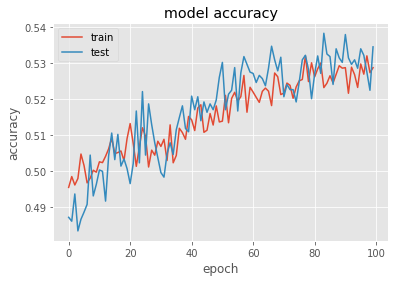

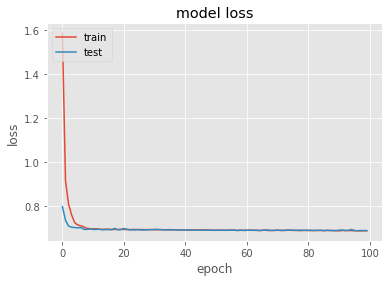

In [24]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
#append binary predictions and probability scores by NN to dataframe
from sklearn.metrics import accuracy_score
y_pred = model.predict([X_test_A, X_test_B])
X_test["Pred_NN_proba"] = y_pred

y_pred[y_pred <= 0.5] = 0.
y_pred[y_pred > 0.5] = 1.

X_test["Pred_NN"] = y_pred
print(f"Final accuracy score on the test is: {accuracy_score(y_test, y_pred)}")

Final accuracy score on the test is: 0.5344734473447345


/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


# Estimating impact of Bias
Now in order to estimate whenever the bias of non-uniformely interacting proteins across the dataset corellates with the predictions made by built Neural Network classifier, we looked on whenever the mistakes made by dummy classfier were the interaction probability score used by dummy classifier corellates with NN confidence in interaction. 

In [26]:
#merging dummy and NN predictions into one df and save backup
X_test["Dummy_score"] = scores
X_test["Dummy_pred"] = dummy_pred
X_test.head()
X_test.to_csv("Dataset_2_interactions.csv")

/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/icv/anaconda3/envs/backkground_removal/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
X_test= pd.read_csv("Dataset_2_interactions.csv", index_col = 0)
X_test.head()

,ID1,ID2,Interaction,Embed1,Embed2,Pred_NN_proba,Pred_NN,Dummy_score,Dummy_pred
11661,P62993,Q8WV28,1,[-30.314545 18.680784 -3.291296 7.03...,[ -79.757 24.477074 -29.119648 24.3...,0.494294,0.0,0.518006,1
6921,O15116,Q9Y333,1,[-19.31474 7.6236525 -4.399617 6.19...,[-14.327597 6.477357 -1.858875 3.26...,0.490870,0.0,0.459459,0
24340,Q01844,P49137,0,[ -73.32277 56.117302 -18.060093 49.4...,[ -62.469803 29.13238 -9.677382 1...,0.514505,1.0,0.476562,0
13736,Q9NRC8,Q9UNH5,0,[-6.31660080e+01 2.48162270e+01 -1.44430721e+...,[-101.53838 37.428402 -27.739685 17.5...,0.508540,1.0,0.500000,1
17982,Q9Y2Q3,P07858,0,[-33.270573 15.214012 -1.7782669 11.09...,[ -49.16577 23.836708 -1.6703827 1...,0.508078,1.0,0.533333,1


In [28]:
#estimating corellation between model confidence and  calculated interaction probability
X_test['Pred_NN_proba'].corr(X_test['Dummy_score'])

0.017682925519895063